### <h2><center><font color='orange'>SVM with Feature Selection<font></a>
<!-- ### <section><font color='blue'>PART 1: MAXIMISING A FUNCTION</a> -->

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame from the pickle file
pickle_file_path = 'cleaned_personal_loan_encoded.pkl'
df = pd.read_pickle(pickle_file_path)

# Prepare the data
X = df.drop('personal_loan_yes', axis=1)
y = df['personal_loan_yes']

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 5 features based on ANOVA F-value
X_new = SelectKBest(f_classif, k=5).fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate the SVM model
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Report:\n", classification_report(y_test, y_pred_svm))


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [7 8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SVM Accuracy: 0.9049429657794676
SVM Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       710
           1       0.57      0.20      0.30        79

    accuracy                           0.90       789
   macro avg       0.74      0.59      0.62       789
weighted avg       0.88      0.90      0.88       789



This code snippet demonstrates a feature selection and classification pipeline using scikit-learn. Here's a breakdown of each step:

1. **Feature Selection**: The `SelectKBest` class from `sklearn.feature_selection` is used to select the top 5 features based on the ANOVA F-value. This method selects the most relevant features for predicting the target variable (`y`) among all available features (`X`).

2. **Data Splitting**: The `train_test_split` function from `sklearn.model_selection` is used to split the dataset into training and testing sets. The `X_new` variable contains the selected features, which are used for both training (`X_train`) and testing (`X_test`) the SVM model.

3. **Model Training**: An SVM model is created using the `SVC` class from `sklearn.svm` and trained on the training set (`X_train`, `y_train`). The `random_state` parameter ensures reproducibility by fixing the random seed.

4. **Prediction and Evaluation**: The trained SVM model is used to predict the target variable (`y_test`) based on the test set (`X_test`). The `accuracy_score` function from `sklearn.metrics` is used to calculate the accuracy of the model's predictions compared to the actual labels (`y_test`). Additionally, the `classification_report` function provides a summary of the model's performance, including precision, recall, F1-score, and support for each class.

Overall, this code demonstrates a basic machine learning workflow, including feature selection, model training, and evaluation, using the SelectKBest feature selection method and an SVM classifier.

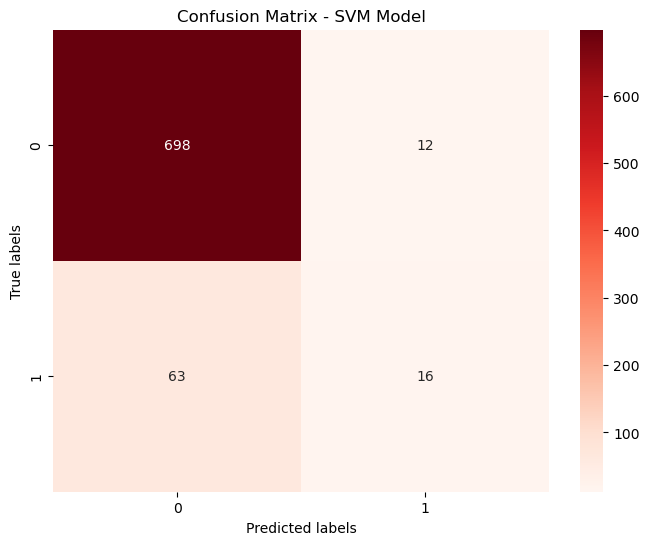

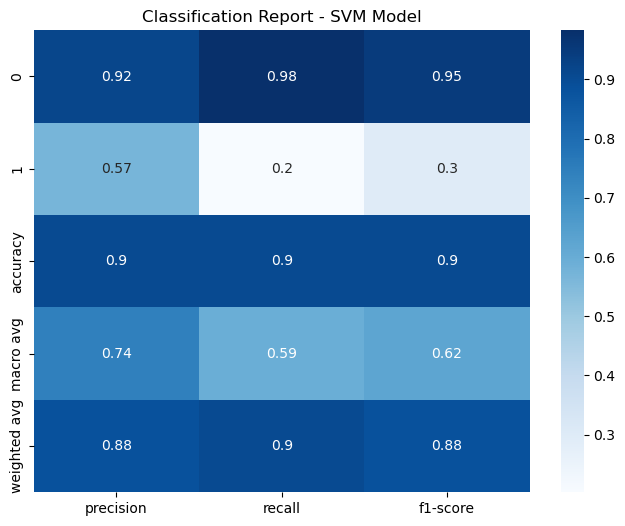

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM Model')
plt.show()

# Classification Report Visualization
clf_report = classification_report(y_test, y_pred_svm, output_dict=True)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report - SVM Model')
plt.show()
